# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. Observe o gráfico de resíduos em função de ```net_bill```  
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [13]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [14]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


#### 1: Matriz de design e matriz y

In [45]:
# Criando a matriz de design e a matriz y utilizando Patsy:
y, X = patsy.dmatrices('tip ~ C(sex) + C(smoker) + C(day) + net_bill', data=tips, return_type='dataframe')

# Ajustando o modelo inicial:
model_full = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo:
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.30e-19
Time:                        12:42:28   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2017      0.258  

#### 2: Removendo variáveis não significantes

In [81]:
# Ajustar o modelo reduzido:
model_reduced = sm.OLS(y, X[['C(sex)[T.Female]' , 'C(day)[T.Fri]' , 'C(day)[T.Sat]']]).fit()

# Obter resíduos e valores ajustados
residuals = model_reduced.resid
fitted_values = model_reduced.fittedvalues

# Exibindo o resumo do modelo:
print(model_reduced.summary())


                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.437
Method:                 Least Squares   F-statistic:                              64.12
Date:                Fri, 26 Jul 2024   Prob (F-statistic):                    1.63e-30
Time:                        13:09:17   Log-Likelihood:                         -566.02
No. Observations:                 244   AIC:                                      1138.
Df Residuals:                     241   BIC:                                      1149.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### 3: Gráfico de resíduos em função de net_bill

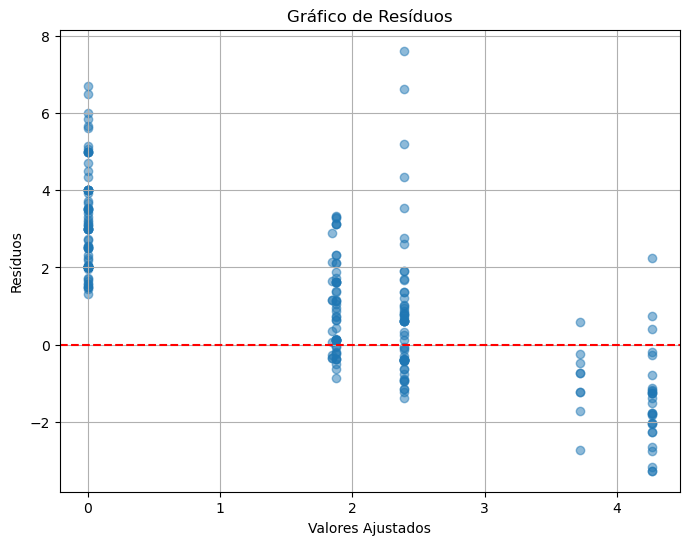

In [83]:
# Gráfico de resíduos
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.grid(True)
plt.show()

### 4: Teste transformação net_bill no log e um polinômio. Escolhendo o melhor modelo

Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     17.64
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           7.18e-17
Time:                        13:17:44   Log-Likelihood:                -379.92
No. Observations:                 244   AIC:                             773.8
Df Residuals:                     237   BIC:                             798.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

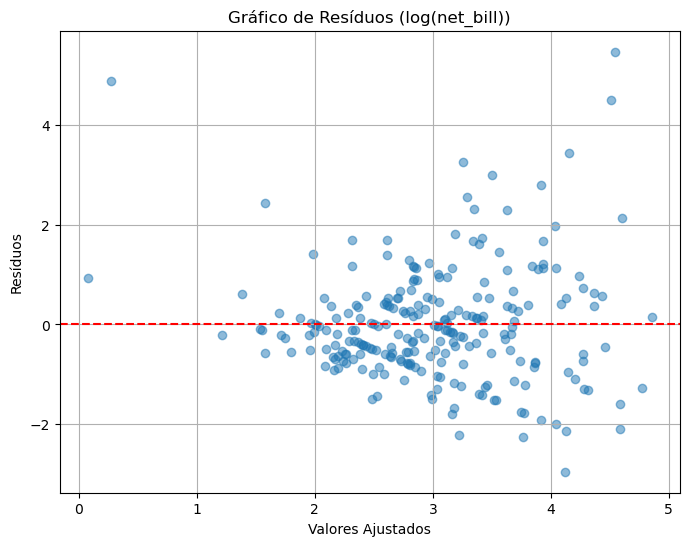

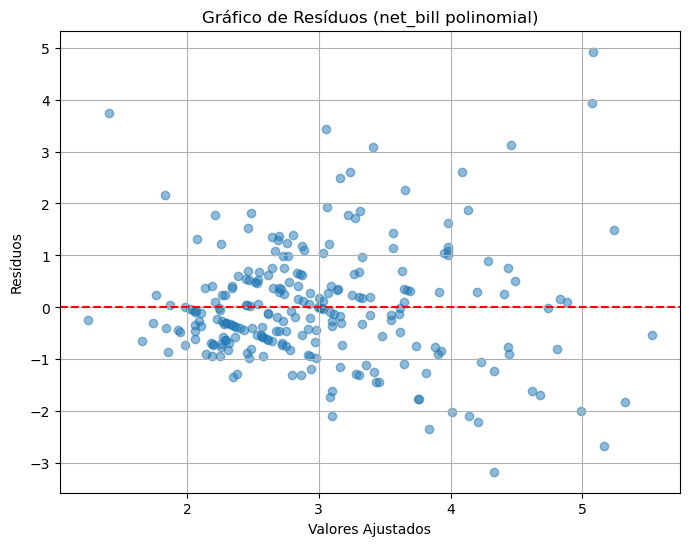

In [88]:
# Criando novas variáveis:
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # Adicionando 1 para evitar log de zero:
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Criando matrizes de design e y para os novos modelos:
y, X = patsy.dmatrices('tip ~ C(sex) + C(smoker) + C(day) + log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y, X).fit()

y_poly, X_poly = patsy.dmatrices('tip ~ C(sex) + C(smoker) + C(day) + net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# Exibindo resumos dos modelos:
print("Modelo com log(net_bill):")
print(model_log.summary())
print("\nModelo com net_bill polinomial:")
print(model_poly.summary())

# Comparando AIC dos modelos:
print("\nAIC do modelo com log(net_bill):", model_log.aic)
print("AIC do modelo com net_bill polinomial:", model_poly.aic)

# Exibindo gráficos de resíduos para os dois modelos:
def plot_residuals(model, title):
    residuals = model.resid
    fitted_values = model.fittedvalues
    plt.figure(figsize=(8, 6))
    plt.scatter(fitted_values, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Resíduos')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_residuals(model_log, 'Gráfico de Resíduos (log(net_bill))')
plot_residuals(model_poly, 'Gráfico de Resíduos (net_bill polinomial)')


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

#### 1: Matriz de design e matriz y

In [104]:
# Criar a matriz de design para o modelo com log(tip_pct):
y, X = patsy.dmatrices('tip_pct ~ C(sex) + C(smoker) + C(day) + net_bill', data=tips, return_type='dataframe')
model_full_tip_pct = sm.OLS(y, X).fit()

# Exibndo o resumo do modelo completo:
print("Modelo Completo (log(tip_pct)):")
print(model_full_tip_pct.summary())


Modelo Completo (log(tip_pct)):
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.774
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.25e-05
Time:                        13:26:25   Log-Likelihood:                 112.97
No. Observations:                 244   AIC:                            -211.9
Df Residuals:                     237   BIC:                            -187.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

### 2. Removendo variáveis não significativas

In [107]:
# Ajustando o modelo reduzido:
significant_vars = X.columns[model_full_tip_pct.pvalues < 0.05]
X_significant = X[significant_vars]
model_reduced_tip_pct = sm.OLS(y, X_significant).fit()

# Exibindo resumo do modelo reduzido:
print("\nModelo Reduzido (significativo):")
print(model_reduced_tip_pct.summary())



Modelo Reduzido (significativo):
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.77
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.17e-06
Time:                        13:26:52   Log-Likelihood:                 109.52
No. Observations:                 244   AIC:                            -213.0
Df Residuals:                     241   BIC:                            -202.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercep

### 3. Gráfico de resíduos

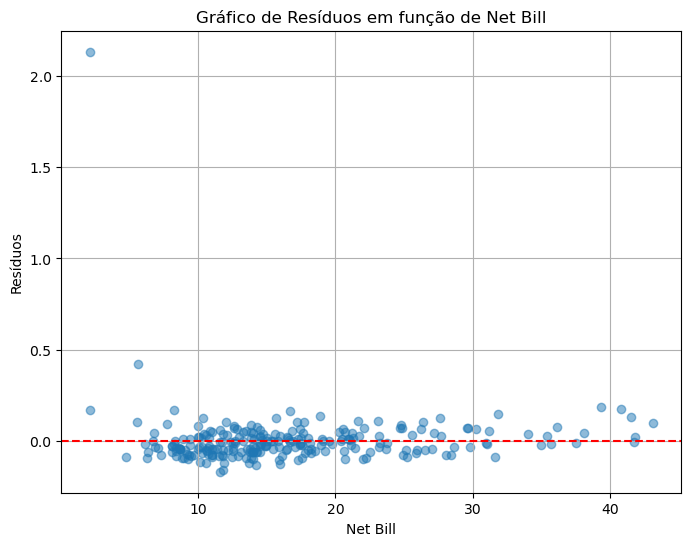

In [109]:
# Gráfico de resíduos em função de net_bill:

residuals = model_reduced_tip_pct.resid
fitted_values = model_reduced_tip_pct.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(tips['net_bill'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de Net Bill')
plt.grid(True)
plt.show()


### 4. Testando as transformações

In [117]:
# Testando transformações de net_bill:
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Modelos com transformações:
y, X_log = patsy.dmatrices('tip_pct ~ C(sex) + C(smoker) + C(day) + log_net_bill', data=tips, return_type='dataframe')
model_log_tip_pct = sm.OLS(y, X_log).fit()

y_poly, X_poly = patsy.dmatrices('tip_pct ~ C(sex) + C(smoker) + C(day) + net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly_tip_pct = sm.OLS(y_poly, X_poly).fit()

# Exibindo resumos dos modelos transformados:
print("\nModelo com log(net_bill):")
print(model_log_tip_pct.summary())
print("\nModelo com net_bill polinomial:")
print(model_poly_tip_pct.summary())

# Comparando AIC dos modelos:
print("\nAIC do modelo com log(net_bill):", model_log_tip_pct.aic)
print("AIC do modelo com net_bill polinomial:", model_poly_tip_pct.aic)



Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     11.25
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           4.73e-11
Time:                        13:29:44   Log-Likelihood:                 126.90
No. Observations:                 244   AIC:                            -239.8
Df Residuals:                     237   BIC:                            -215.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept    

### 5. R² na escala de tip

In [115]:
from sklearn.metrics import r2_score

# Modelo final:
best_model = model_reduced_tip_pct  

# Previsão e cálculo do R²:
y_pred = best_model.predict(X_significant)
r2 = r2_score(tips['tip_pct'], y_pred)

print("\nR² do modelo final na escala de tip_pct:", r2)


R² do modelo final na escala de tip_pct: 0.10255479090301722


#### Quando comparamos os gráficos, por exemplo, verificamos que esse modelo apresenta o melhor coeficiente de determinação.

______________

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros.
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [6]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [8]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

### 1. Modelo de regressão linear simples: explicando renda como variável resposta, por tempo_emprego como variável explicativa

In [123]:
# Ajustando o modelo de regressão linear simples
model_simple = smf.ols('renda ~ tempo_emprego', data=df).fit()

# Resumo do modelo
model_simple.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:53:03   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Análise de Resíduos

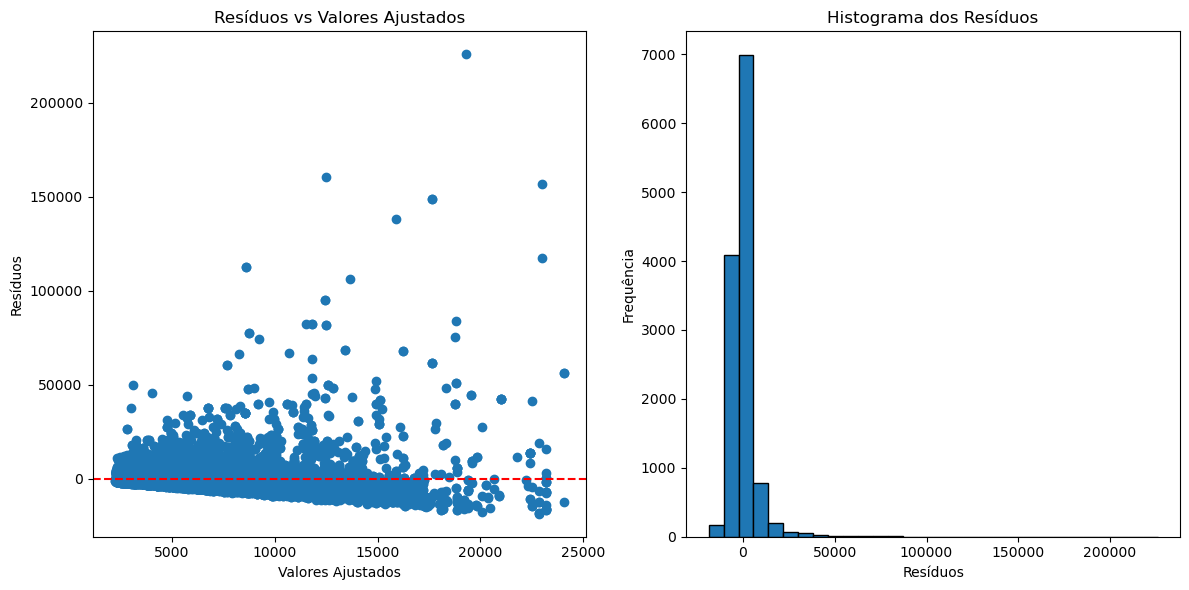

In [134]:
# Calculando resíduos:
df['residuos'] = model_simple.resid
df['valores_ajustados'] = model_simple.fittedvalues

# Plotando os resíduos:
plt.figure(figsize=(12, 6))

# Resíduos vs Valores Ajustados:
plt.subplot(1, 2, 1)
plt.scatter(df['valores_ajustados'], df['residuos'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')

# Histograma dos resíduos:
plt.subplot(1, 2, 2)
plt.hist(df['residuos'], bins=30, edgecolor='k')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

plt.tight_layout()
plt.show()


### 3. Ajuste do Modelo de Regressão Linear Múltipla

In [140]:
# Ajustando o modelo de regressão linear múltipla:
model_multiple = smf.ols('renda ~ tempo_emprego + posse_de_veiculo + posse_de_imovel + qt_pessoas_residencia', data=df).fit()

# Resumo do modelo:
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     600.1
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:08:44   Log-Likelihood:            -1.2953e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12422   BIC:                         2.591e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 4. Remoção de variáveis não significativas

#### Aqui temos todas as variáveis significativas, sem a necessidade de remoção

In [150]:
# Ajustar o modelo de regressão linear múltipla com variáveis significativas
model_significant = smf.ols('renda ~ tempo_emprego + posse_de_veiculo + posse_de_imovel + qt_pessoas_residencia', data=df).fit()

# Resumo do modelo
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     600.1
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:13:24   Log-Likelihood:            -1.2953e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12422   BIC:                         2.591e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 5. Análise de Resíduos do Modelo Final

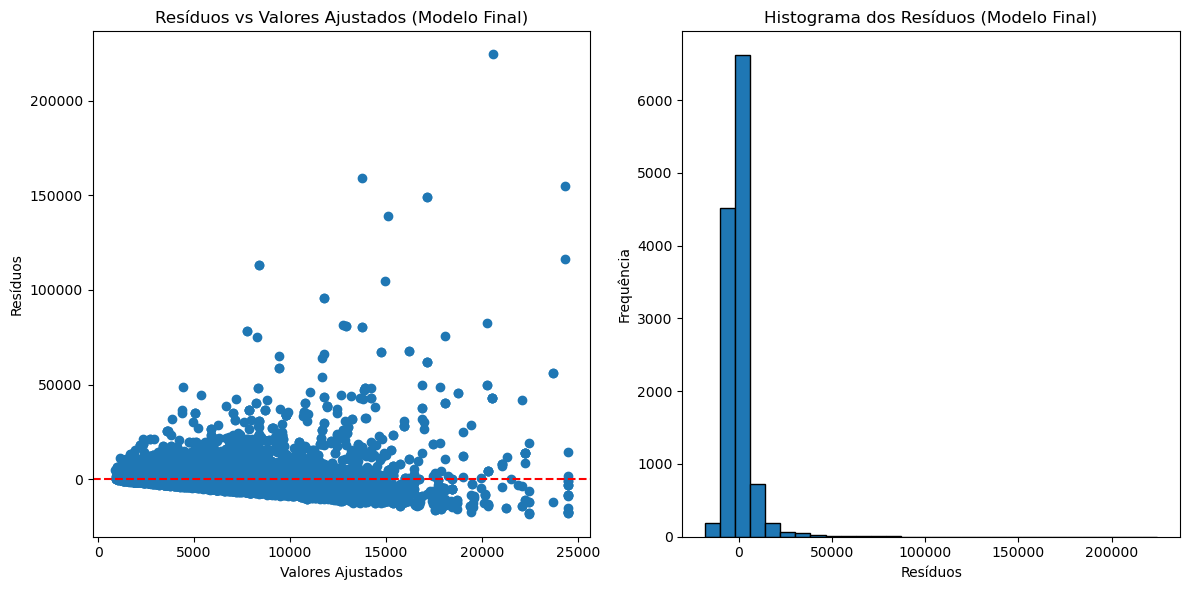

In [155]:
# Calculandoresíduos para o modelo final:
df['residuos_final'] = model_significant.resid
df['valores_ajustados_final'] = model_significant.fittedvalues

# Plotando resíduos:
plt.figure(figsize=(12, 6))

# Resíduos vs Valores Ajustados:
plt.subplot(1, 2, 1)
plt.scatter(df['valores_ajustados_final'], df['residuos_final'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados (Modelo Final)')

# Histograma dos resíduos:
plt.subplot(1, 2, 2)
plt.hist(df['residuos_final'], bins=30, edgecolor='k')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos (Modelo Final)')

plt.tight_layout()
plt.show()


#### Valores reajustados com o máximo de concentração possível dentro do modelo final proposto.